# Анализ данных и классификация KNN

Пропущенные значения:
id         0.0
gravity    0.0
ph         0.0
osmo       0.0
cond       0.0
urea       0.0
calc       0.0
target     0.0
dtype: float64
Статистические показатели:
               id     gravity          ph         osmo        cond  \
count  414.000000  414.000000  414.000000   414.000000  414.000000   
mean   206.500000    1.017894    5.955459   651.545894   21.437923   
std    119.655756    0.006675    0.642260   234.676567    7.514750   
min      0.000000    1.005000    4.760000   187.000000    5.100000   
25%    103.250000    1.012000    5.530000   455.250000   15.500000   
50%    206.500000    1.018000    5.740000   679.500000   22.200000   
75%    309.750000    1.022000    6.280000   840.000000   27.600000   
max    413.000000    1.040000    7.940000  1236.000000   38.000000   

             urea        calc      target  
count  414.000000  414.000000  414.000000  
mean   278.657005    4.114638    0.444444  
std    136.442249    3.217641    0.497505  
min     1

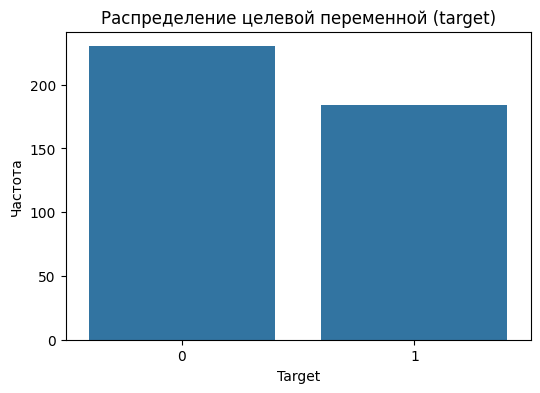

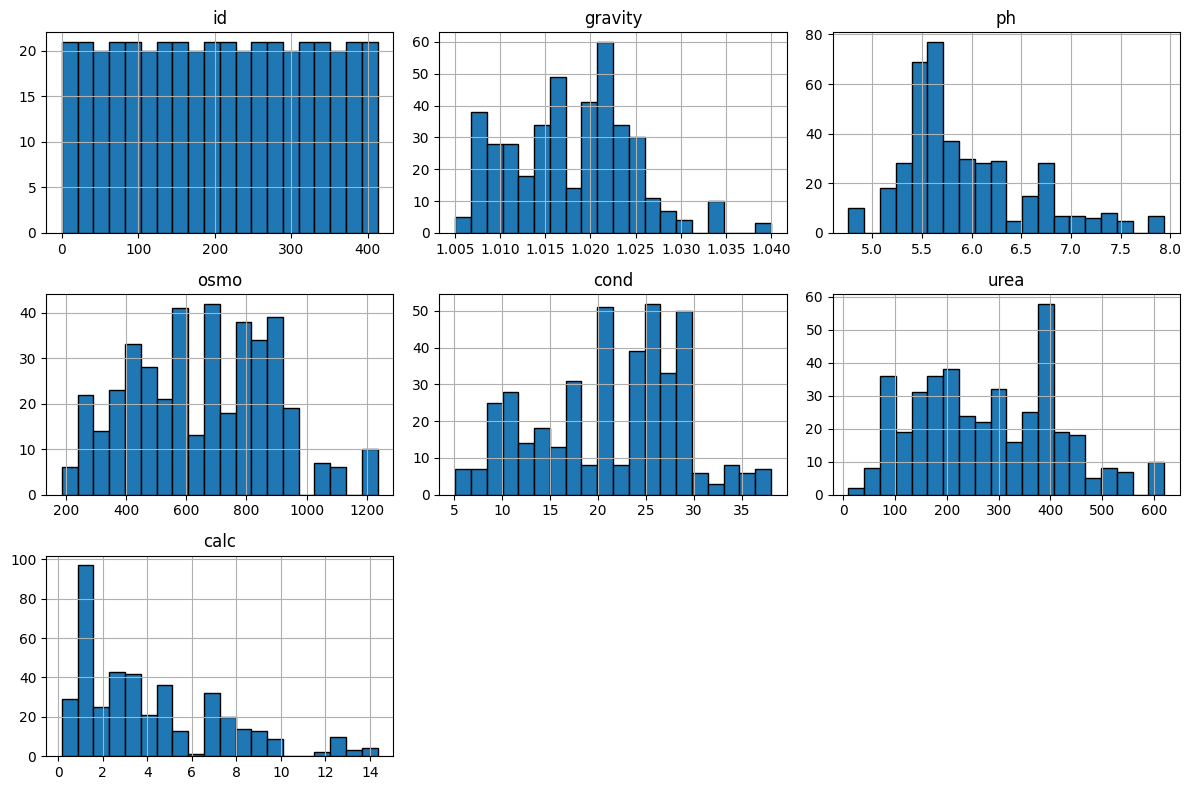

Лучший k: 11
Confusion Matrix:
[[35 11]
 [11 26]]
Accuracy: 0.7349397590361446
Precision: 0.7027027027027027
Recall: 0.7027027027027027
F1 Score: 0.7027027027027027
ROC AUC Score: 0.795828437132785


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score
)

# Загружаем данные
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Исследовательский анализ данных (EDA)
print("Пропущенные значения:")
print(train_df.isnull().mean())

print("Статистические показатели:")
print(train_df.describe())

print("Доля класса 1 в target:", train_df['target'].mean())

# Визуализация
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df['target'])
plt.title("Распределение целевой переменной (target)")
plt.xlabel("Target")
plt.ylabel("Частота")
plt.show()

train_df.drop(columns=["target"]).hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Разделение данных
X = train_df.drop(columns=["target"])
y = train_df["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Стандартизация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Подбор k для KNN
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Лучший k: {best_k}")

# Обучение и предсказание
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_val_scaled)

# Метрики
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, best_knn.predict_proba(X_val_scaled)[:, 1]))
